In [8]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
pd.options.mode.chained_assignment = None

dataDir = Path.cwd().parent.parent/'Data/processed'
usecols1 = ['id', 'Gigacow_Cow_Id', 'BreedName', 'problematic']
usecols = ['id', 'Gigacow_Cow_Id', 'BreedName', 'label']

problematic_dataset = pd.read_csv(dataDir/"Cow_Prob_dataset_L1.csv", index_col="id", usecols=usecols1)
problematic_dataset.drop_duplicates(subset=['Gigacow_Cow_Id'], inplace=True)
problematic_dataset.rename(columns={"problematic": "label"}, inplace=True)

prolonged_problematic_dataset = pd.read_csv(dataDir/"prolonged_problematic_targetCows/cow_total/Cow_prolonged_problematic_dataset_L1_L2.csv", index_col="id", usecols=usecols)
prolonged_problematic_dataset.drop_duplicates(subset=['Gigacow_Cow_Id'], inplace=True)

#analysis on prolonged_problematic&problematic problem
prolonged_problematic_list = list(prolonged_problematic_dataset.Gigacow_Cow_Id)
problematic_list = list(problematic_dataset.Gigacow_Cow_Id)

association_cow_list = list(set(prolonged_problematic_list) & set(problematic_list))

In [28]:
# save a list of cow data for problematic problems 
cow_dict = dict()
problematic_list = []
prolonged_problematic_list = []

for i, cow_id in enumerate(association_cow_list):
    problematic_label = int(problematic_dataset.loc[problematic_dataset.Gigacow_Cow_Id == cow_id].label)
    prolonged_problematic_label = int(prolonged_problematic_dataset.loc[prolonged_problematic_dataset.Gigacow_Cow_Id == cow_id].label)
    problematic_list.append(problematic_label)
    prolonged_problematic_list.append(prolonged_problematic_label)
    cow_dict[cow_id] = str(problematic_label)+str(prolonged_problematic_label)

print("num of cows: ", len(cow_dict))
print("info: ", cow_dict)

# collection the key-value pairs from the cow dict
collection_labels = list(cow_dict.values())
labels = list(Counter(collection_labels).keys())
num = list(Counter(collection_labels).values())
print("The label of cow dict: ", labels)
print("The amount of labels: ", num)
# map the label with explainable text
names = { '00':"Problematic in L1 Problematic in L2", '01':"Problematic in L1 Normal in L2"}
labels = [x if x not in names else names[x] for x in names]
print(labels)

num of cows:  19
info:  {769: '00', 3718: '01', 5147: '01', 2844: '01', 1181: '01', 5160: '00', 1985: '00', 74: '00', 1738: '00', 1103: '00', 4176: '00', 5465: '00', 478: '01', 5088: '01', 5092: '00', 2278: '00', 1905: '00', 5235: '00', 3447: '00'}
The label of cow dict:  ['00', '01']
The amount of labels:  [13, 6]
['Problematic in L1 Problematic in L2', 'Problematic in L1 Normal in L2']


In [27]:
num

[13, 6]

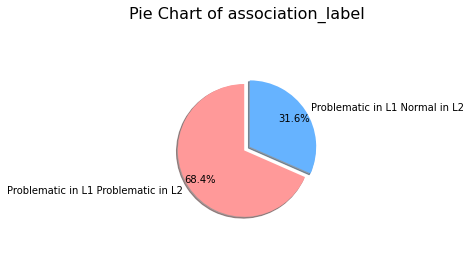

In [30]:
# plot the consist of labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(num, colors = colors, startangle=90, 
        explode=[0, 0.1], labels=labels,
        shadow=True, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
ax1.axis('equal')

#plt.legend(fontsize=12)
plt.title("Pie Chart of association_label", fontsize=16)
plt.tight_layout()

plt.show()

In [31]:
problematic_select = problematic_dataset.loc[problematic_dataset.Gigacow_Cow_Id.isin(association_cow_list)]
problematic_select.rename(columns={"label":"problematic_label"}, inplace=True)
prolonged_problematic_select = prolonged_problematic_dataset.loc[prolonged_problematic_dataset.Gigacow_Cow_Id.isin(association_cow_list)]
prolonged_problematic_select.rename(columns={"label":"prolonged_problematic_label"}, inplace=True)

association_cows = problematic_select.merge(prolonged_problematic_select, how='left', left_on=['Gigacow_Cow_Id', 'BreedName'], right_on=['Gigacow_Cow_Id', 'BreedName'])
association_cows

,Gigacow_Cow_Id,BreedName,problematic_label,prolonged_problematic_label
0,5147,1,0,1
1,5160,1,0,0
2,74,1,0,0
3,1103,2,0,0
4,4176,1,0,0
5,5235,2,0,0
6,3718,1,0,1
7,1181,2,0,1
8,1738,2,0,0
9,2278,1,0,0


In [35]:
breed_1_label = ['Problematic in L1 Problematic in L2', 'Problematic in L1 Normal in L2']
breed_2_label = ['Problematic in L1 Problematic in L2', 'Problematic in L1 Normal in L2']
association_cows["problematic_prolonged_problematic_label"] = association_cows.problematic_label.astype(str) + association_cows.prolonged_problematic_label.astype(str)
cow_Breed_1 = association_cows.loc[association_cows.BreedName == 1].copy()
cow_Breed_2 = association_cows.loc[association_cows.BreedName == 2].copy()
cow_Breed_1_counter = cow_Breed_1.problematic_prolonged_problematic_label.value_counts().reset_index(name='Sum of problematic_prolonged_problematic_label').copy()
cow_Breed_2_counter = cow_Breed_2.problematic_prolonged_problematic_label.value_counts().reset_index(name='Sum of problematic_prolonged_problematic_label').copy()

In [36]:
cow_Breed_2_counter

,index,Sum of problematic_prolonged_problematic_label
0,00,7
1,01,2


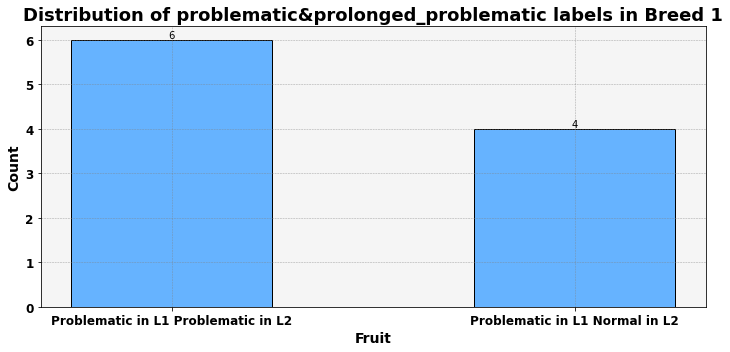

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

bars = ax.bar(breed_1_label, cow_Breed_1_counter['Sum of problematic_prolonged_problematic_label'], color='#66b3ff', edgecolor='black', width=0.5)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, yval, ha='center', va='bottom')

ax.set_facecolor('whitesmoke')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_title("Distribution of problematic&prolonged_problematic labels in Breed 1", fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax.set_xlabel("Fruit", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Count", fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

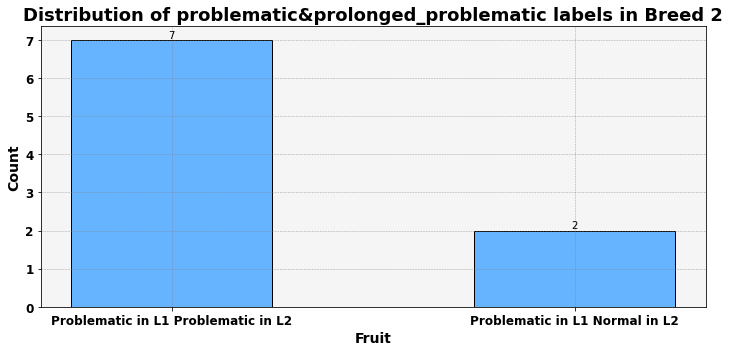

In [38]:
fig, ax = plt.subplots(figsize=(10,5))

bars = ax.bar(breed_2_label, cow_Breed_2_counter['Sum of problematic_prolonged_problematic_label'], color='#66b3ff', edgecolor='black', width=0.5)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, yval, ha='center', va='bottom')

ax.set_facecolor('whitesmoke')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_title("Distribution of problematic&prolonged_problematic labels in Breed 2", fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax.set_xlabel("Fruit", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Count", fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [39]:
problematic_dataset.loc[problematic_dataset.label == 1].value_counts("BreedName")

BreedName
2     17
99    10
4      5
dtype: int64